In [39]:
#Importamos las bibliotecas que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score,precision_score,f1_score, roc_curve, auc
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import normalize

data = pd.read_csv('data/dataset_turnos.csv')
#data = data.drop(['Unnamed: 0','llovio','temp','precipprob','sealevelpressure','windspeed','appointmentfromtime','solarradiation','visibility','humidity','windgust','conditions','uvindex','visibility','solarradiation','tempmax','tempmin','feelslike','precip','precipcover','preciptype'], axis=1)
data = data.drop(['Unnamed: 0','appointmentfromtime'], axis=1)
data.sample(3)


,DayName,priordayholiday,nextdayholiday,day,hour,outofschedule,appointmentstate,age,daysbeforereserved,gender,...,preciptype,windgust,windspeed,sealevelpressure,visibility,solarradiation,uvindex,conditions,llovio,month
16612,Tuesday,0,0,29,17,1,1,5,0,F,...,rain,60.8,27.7,1005.5,9.7,138.2,7,"Rain, Partially cloudy",1,3
19253,Thursday,0,0,26,14,1,0,7,3,F,...,no rain,28.4,14.8,1025.1,10.0,108.1,5,Partially cloudy,0,5
12878,Wednesday,0,0,22,15,0,0,17,7,F,...,no rain,0.0,25.9,1014.9,7.7,386.5,10,Partially cloudy,0,12


In [40]:
data.describe()

,priordayholiday,nextdayholiday,day,hour,outofschedule,appointmentstate,age,daysbeforereserved,firsttime,emailvalid,...,precipprob,precipcover,windgust,windspeed,sealevelpressure,visibility,solarradiation,uvindex,llovio,month
count,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,...,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000
mean,0.000615,0.040236,15.393522,13.791206,0.239905,0.597258,6.247991,14.903924,0.411678,0.675603,...,23.602837,2.233843,22.835253,26.933579,1016.089092,8.917617,193.427475,6.380378,0.236028,5.476832
std,0.024785,0.196518,8.686832,2.983032,0.427036,0.490461,4.830477,15.145882,0.492149,0.468160,...,42.464986,7.139158,24.795075,7.919231,5.709042,1.572155,104.331763,2.429631,0.424650,3.153819
min,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.400000,999.100000,1.900000,12.600000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,8.000000,11.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,20.500000,1012.000000,8.400000,104.000000,4.000000,0.000000,3.000000
50%,0.000000,0.000000,15.000000,14.000000,0.000000,1.000000,5.000000,12.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,25.900000,1016.400000,9.700000,171.500000,6.000000,0.000000,5.000000
75%,0.000000,0.000000,23.000000,17.000000,0.000000,1.000000,10.000000,24.000000,1.000000,1.000000,...,0.000000,0.000000,46.400000,31.700000,1020.200000,10.000000,285.600000,8.000000,0.000000,8.000000
max,1.000000,1.000000,31.000000,19.000000,1.000000,1.000000,18.000000,180.000000,1.000000,1.000000,...,100.000000,91.670000,83.500000,61.200000,1030.600000,10.900000,420.200000,10.000000,1.000000,12.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21150 entries, 0 to 21149
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DayName             21150 non-null  object 
 1   priordayholiday     21150 non-null  int64  
 2   nextdayholiday      21150 non-null  int64  
 3   day                 21150 non-null  int64  
 4   hour                21150 non-null  int64  
 5   outofschedule       21150 non-null  int64  
 6   appointmentstate    21150 non-null  int64  
 7   age                 21150 non-null  int64  
 8   daysbeforereserved  21150 non-null  int64  
 9   gender              21150 non-null  object 
 10  healthcoverage      21150 non-null  object 
 11  firsttime           21150 non-null  int64  
 12  emailvalid          21150 non-null  int64  
 13  endofmonth          21150 non-null  int64  
 14  tempmax             21150 non-null  float64
 15  tempmin             21150 non-null  float64
 16  temp

### Vemos si el dataset se encuentra balanceado

In [42]:
data['appointmentstate'].value_counts(normalize=True)

1    0.597258
0    0.402742
Name: appointmentstate, dtype: float64

In [43]:
data_dummies=pd.get_dummies(data[data.select_dtypes(['object']).columns], drop_first = True)
data_dummies

,DayName_Monday,DayName_Thursday,DayName_Tuesday,DayName_Wednesday,gender_M,healthcoverage_Sin OS,preciptype_rain,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,1,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21145,1,0,0,0,0,0,0,0,1,0,0
21146,1,0,0,0,0,0,0,0,1,0,0
21147,1,0,0,0,1,0,0,0,1,0,0
21148,1,0,0,0,1,0,0,0,1,0,0


In [44]:
data_modelo = pd.concat([data.select_dtypes(['int64','float64']),data_dummies], axis = 1)
data_modelo = data_modelo.reset_index(drop=True)
data_modelo.head(3)



,priordayholiday,nextdayholiday,day,hour,outofschedule,appointmentstate,age,daysbeforereserved,firsttime,emailvalid,...,DayName_Thursday,DayName_Tuesday,DayName_Wednesday,gender_M,healthcoverage_Sin OS,preciptype_rain,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,0,0,4,8,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,4,9,0,1,11,18,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,4,9,0,1,1,18,1,0,...,0,0,0,1,0,0,1,0,0,0


<AxesSubplot:>

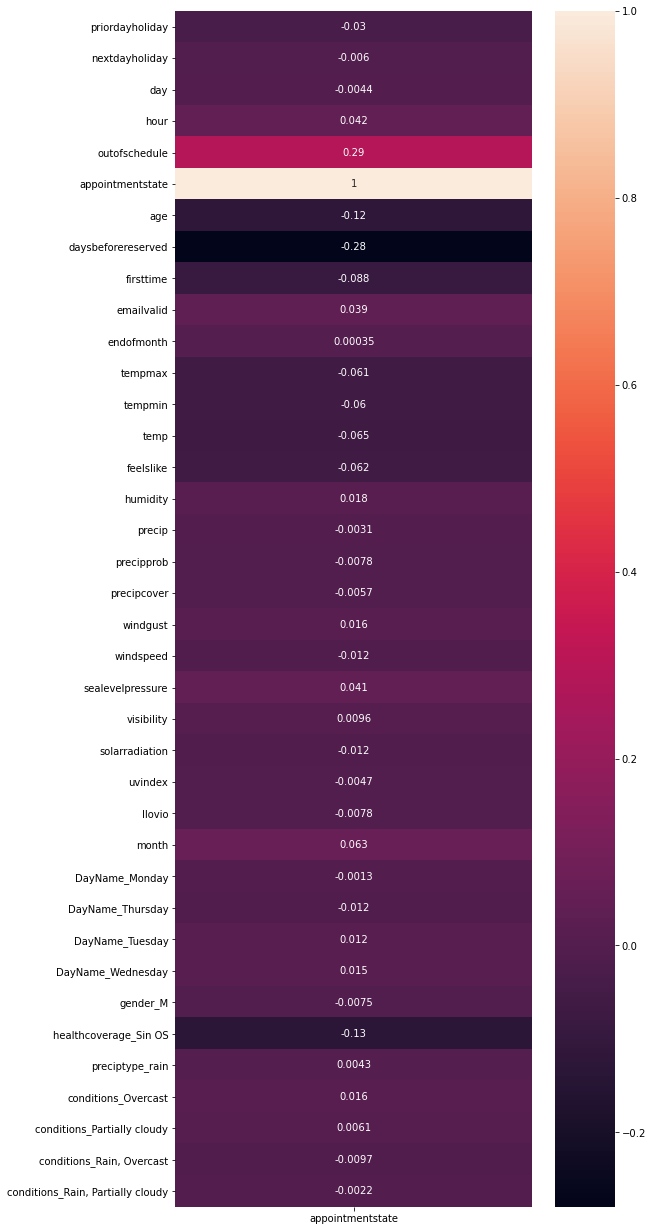

In [45]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
plt.figure(figsize=(8,22))
sns.heatmap(data_modelo.corr()[['appointmentstate']], annot=True)

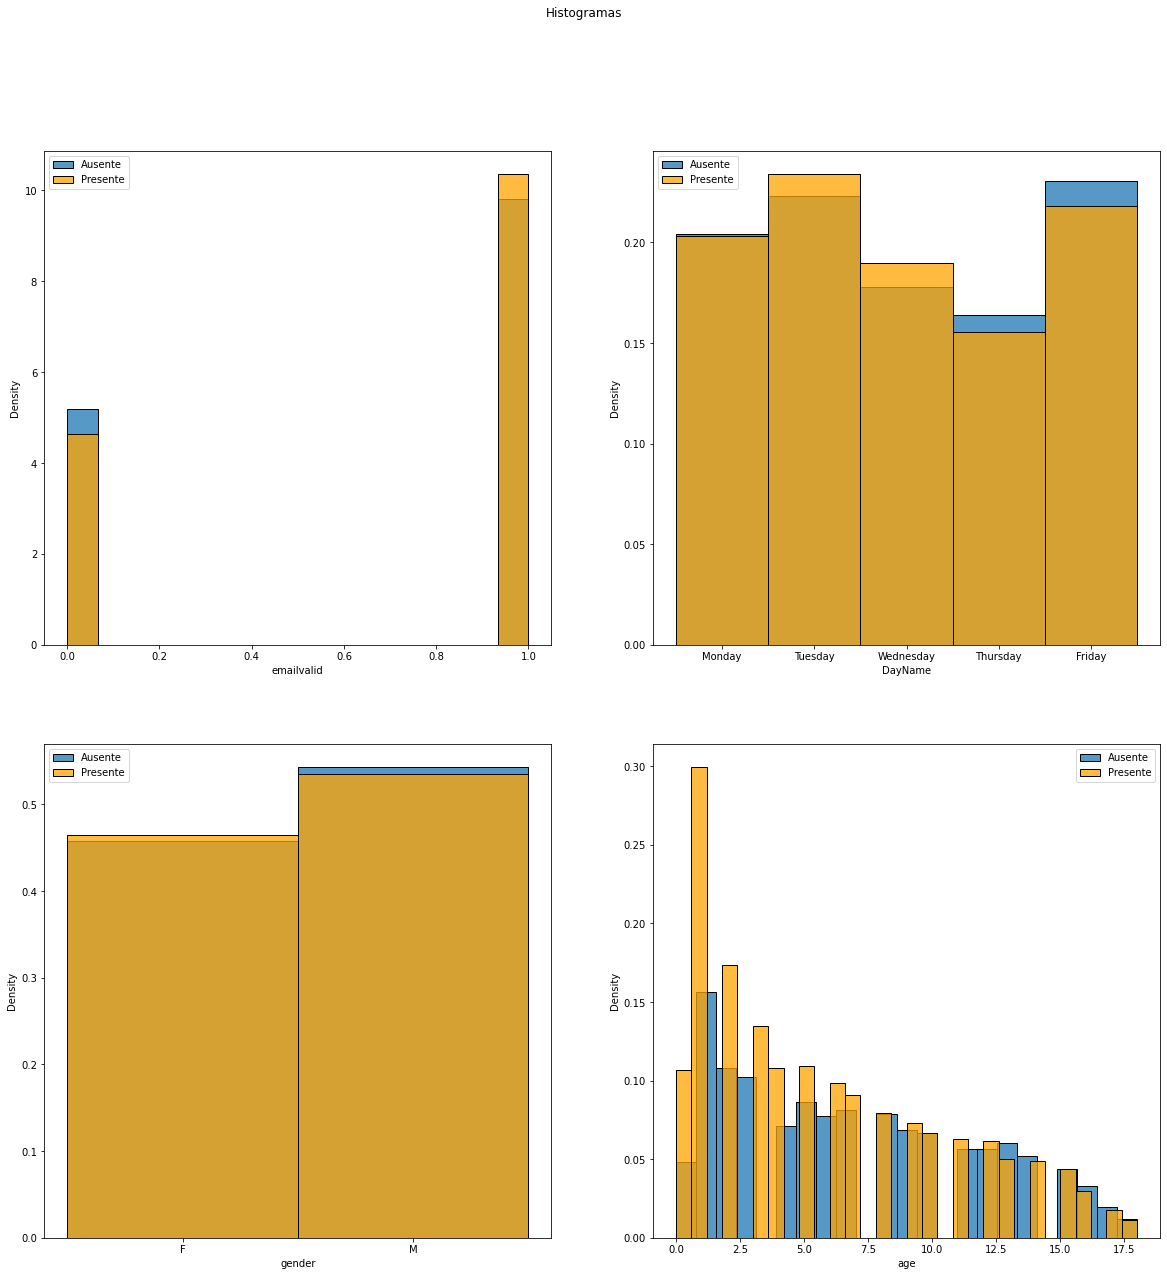

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.suptitle('Histogramas')
for c, ax in zip(['emailvalid','DayName','gender','age'], axes.flatten()):
    sns.histplot(data = data.loc[data['appointmentstate']==0, c].dropna(), stat = 'density', ax = ax, kde = False )
    sns.histplot(data = data.loc[data['appointmentstate']==1, c].dropna(), stat = 'density', kde=False, ax=ax, color = 'orange')
    ax.legend(['Ausente', 'Presente'])
    
    
   
    

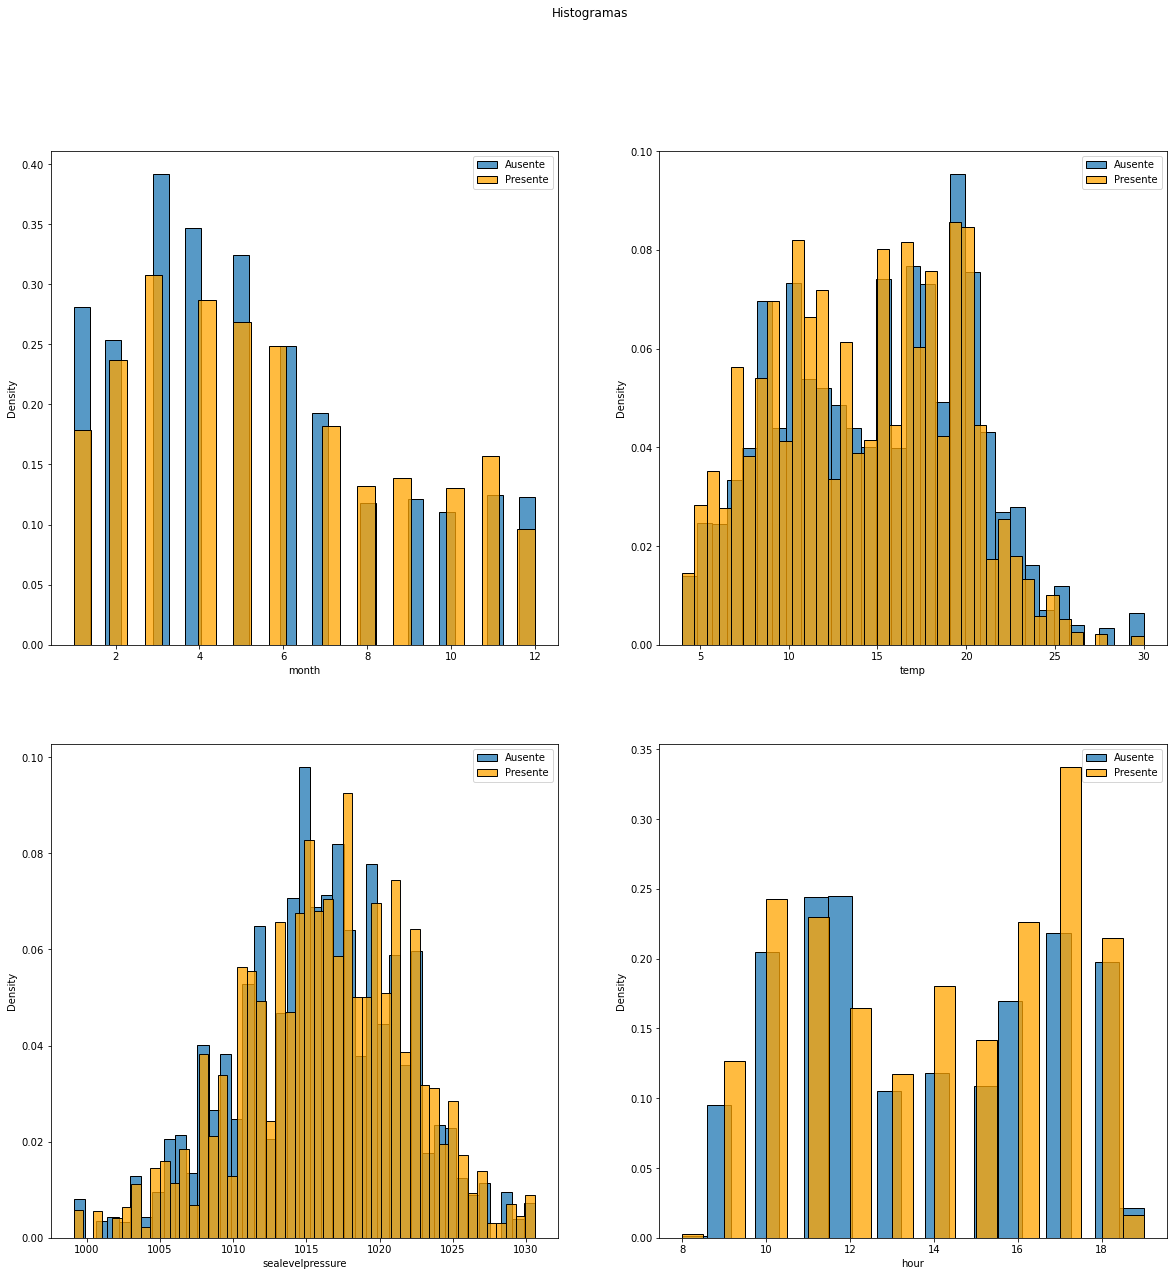

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.suptitle('Histogramas')
for c, ax in zip(['month','temp','sealevelpressure','hour'], axes.flatten()):
    sns.histplot(data = data.loc[data['appointmentstate']==0, c].dropna(), stat = 'density', ax = ax, kde = False )
    sns.histplot(data = data.loc[data['appointmentstate']==1, c].dropna(), stat = 'density', kde=False, ax=ax, color = 'orange')
    ax.legend(['Ausente', 'Presente'])
    

In [48]:
#Genero mi variable X
X=data_modelo.drop(['appointmentstate'],axis=1)

#Genero la variable y
y = data_modelo['appointmentstate'].squeeze()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 30)

In [49]:

def getmetrics(conf_mat):
    return conf_mat[1,1],conf_mat[0,0],conf_mat[0,1],conf_mat[1,0]

def printscores(test,predict):
    TP,TN,FP,FN = getmetrics(confusion_matrix(test, predict))
    return pd.DataFrame(
                {'': [accuracy_score(test, predict),
                            recall_score(test, predict),
                            precision_score(test, predict),
                            f1_score(test, predict),
                            TN / (TN + FP)
                           ]},
                index=['Accuracy','Recall', 'Precision', 'F1 Score', 'Specificity']
            )

def heatmap_matrix_data(y_test,y_preds, title):
    cf_matrix = confusion_matrix(y_test, y_preds)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="BuGn",cbar=False, ax=ax)
    plt.title(title)
    plt.xlabel('Predicted \n'+printscores(y_test,y_preds).to_string())
    plt.ylabel('True')
    plt.show()

## Naive Bayes

In [50]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [51]:
Y_pred_gnb = gnb.predict(X_test)

In [52]:
printscores(y_test, Y_pred_gnb)

,
Accuracy,0.618949
Recall,0.955668
Precision,0.616800
F1 Score,0.749721
Specificity,0.119718


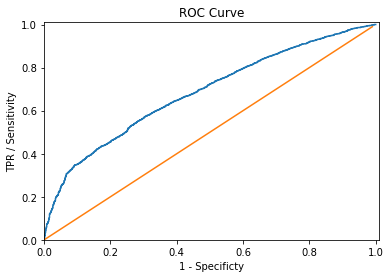

In [53]:
probs = gnb.predict_proba(X_test)
fpr,tpr,_ = roc_curve(y_test, probs[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [54]:
auc(fpr,tpr)

0.6840428362873037

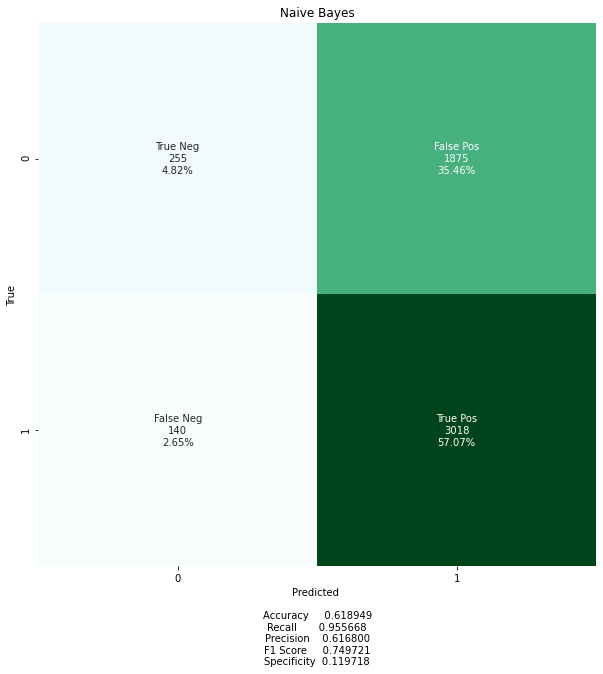

In [55]:
heatmap_matrix_data(y_test, Y_pred_gnb,'Naive Bayes')

In [56]:
probs_1 = probs[:,1]
y_pred_2 = probs_1 > 0.7

In [57]:
printscores(y_test, y_pred_2)

,
Accuracy,0.633132
Recall,0.896453
Precision,0.637039
F1 Score,0.744804
Specificity,0.242723


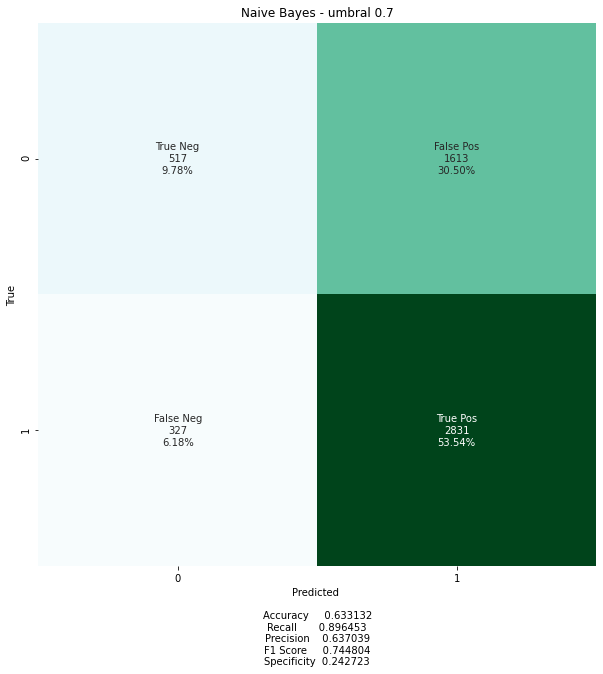

In [58]:
heatmap_matrix_data(y_test, y_pred_2,'Naive Bayes - umbral 0.7')

## GRID SEARCH 

In [59]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [60]:
models = [LogisticRegression()]

params = [
    {'C': np.logspace(-3,3,7),
     'penalty': ['l1', 'l2','none'],
     'solver':['newton-cg', 'lbfgs', 'sag', 'saga']
    }    
]


In [61]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5, random_state=30, shuffle=True)

In [62]:
%%time

grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='roc_auc', cv=folds, n_jobs=-1)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='roc_auc')
CPU times: total: 2.25 s
Wall time: 46.4 s


In [63]:
models = [KNeighborsClassifier()]

params = [   
    {'n_neighbors': range(1,30),
     'algorithm': ['ball_tree', 'kd_tree', 'brute'],
     'metric' : ['minkowski','manhattan','euclidean'],
     'weights' : ['uniform', 'distance'],
     'p' : [1, 2, 3]}
]



In [64]:
%%time

from sklearn.model_selection import RandomizedSearchCV

for i in range(len(models)):
    gs = RandomizedSearchCV(estimator=models[i], param_distributions=params[i], scoring='roc_auc', cv=folds, n_jobs=-1)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'metric': ['minkowski', 'manhattan',
                                                   'euclidean'],
                                        'n_neighbors': range(1, 30),
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   scoring='roc_auc')
CPU times: total: 594 ms
Wall time: 40.3 s


In [65]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.7183550638734071
LogisticRegression(solver='newton-cg')
{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6966863629683729
KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=25, p=3,
                     weights='distance')
{'weights': 'distance', 'p': 3, 'n_neighbors': 25, 'metric': 'euclidean', 'algorithm': 'brute'}


In [66]:
X_test = scaler.transform(X_test)
y_preds_log = grids[0].predict(X_test)
y_preds_knn = grids[1].predict(X_test)

probs_log = grids[0].predict_proba(X_test)
probs_knn = grids[1].predict_proba(X_test)



In [67]:
print (classification_report(y_test, y_preds_log))

              precision    recall  f1-score   support

           0       0.58      0.46      0.52      2130
           1       0.68      0.78      0.73      3158

    accuracy                           0.65      5288
   macro avg       0.63      0.62      0.62      5288
weighted avg       0.64      0.65      0.64      5288



In [68]:
printscores(y_test, y_preds_log)

,
Accuracy,0.650340
Recall,0.777707
Precision,0.681654
F1 Score,0.726520
Specificity,0.461502


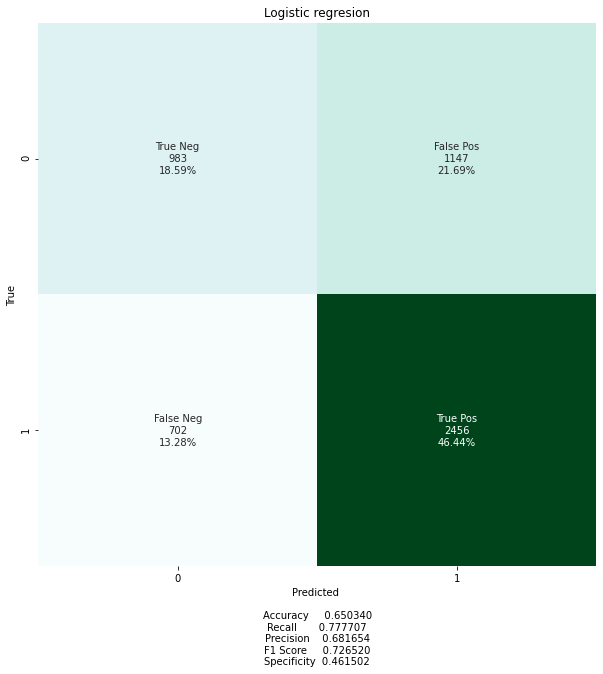

In [69]:
heatmap_matrix_data(y_test, y_preds_log,'Logistic regresion')

In [70]:
printscores(y_test, y_preds_knn)

,
Accuracy,0.652988
Recall,0.794807
Precision,0.678929
F1 Score,0.732312
Specificity,0.442723


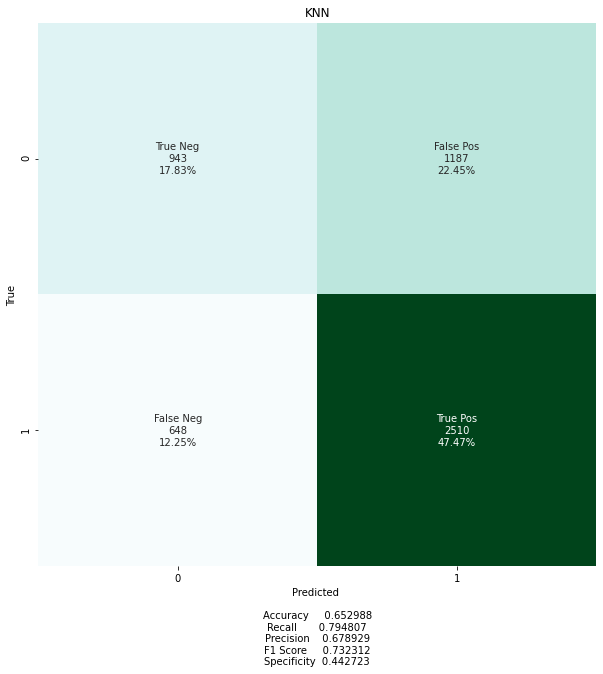

In [71]:
heatmap_matrix_data(y_test, y_preds_knn,'KNN')

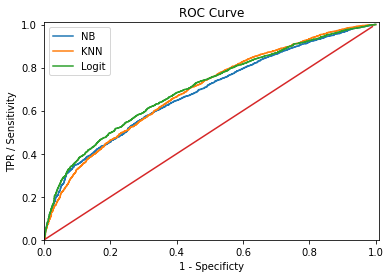

In [72]:
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, probs[:,1])
fpr_knn,tpr_knn,thr_knn = roc_curve(y_test, probs_knn[:,1])
fpr_log,tpr_log,thr_log = roc_curve(y_test, probs_log[:,1])


optimal_idx_nb = np.argmax(tpr_nb - fpr_nb)
optimal_threshold_nb = thr_nb[optimal_idx_nb]

optimal_idx_knn = np.argmax(tpr_knn - fpr_knn)
optimal_threshold_knn = thr_knn[optimal_idx_knn]

optimal_idx_log = np.argmax(tpr_log - fpr_log)
optimal_threshold_log = thr_log[optimal_idx_log]

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_knn,tpr_knn)
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','KNN','Logit'])
plt.show()

In [73]:
print('AUC-NB=', auc(fpr_nb, tpr_nb))
print('AUC-KNN=', auc(fpr_knn, tpr_knn))
print('AUC-Logit=', auc(fpr_log, tpr_log))


print('threshold nb=', optimal_threshold_nb)
print('threshold -KNN=', optimal_threshold_knn)
print('threshold-Logit=', optimal_threshold_log)


AUC-NB= 0.6840428362873037
AUC-KNN= 0.6929920137247381
AUC-Logit= 0.70439802632557
threshold nb= 0.9499059383933587
threshold -KNN= 0.5727189264367207
threshold-Logit= 0.6313691648201256


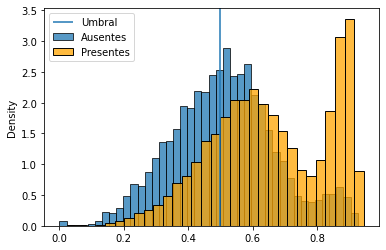

In [74]:
# Histograma de probabilidades
sns.histplot(data = grids[0].predict_proba(X_train[y_train==0])[:,1], stat = 'density')
sns.histplot(data = grids[0].predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'orange')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'Ausentes', 'Presentes'])

In [75]:
y_pred_train_065 = grids[0].predict_proba(X_test)[:,1] > 0.63

In [76]:
printscores(y_test, y_pred_train_065)

,
Accuracy,0.623676
Recall,0.519633
Precision,0.776254
F1 Score,0.622534
Specificity,0.777934


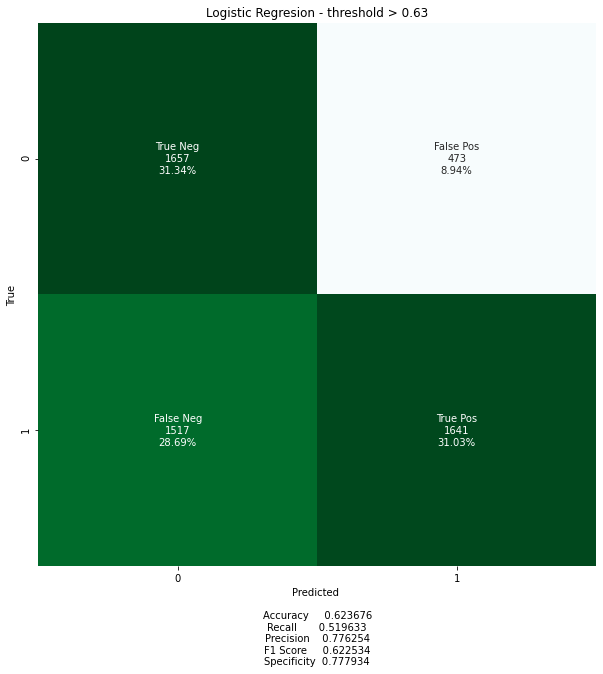

In [77]:
heatmap_matrix_data(y_test, y_pred_train_065,'Logistic Regresion - threshold > 0.63')

In [ ]:
# Histograma de probabilidades
sns.histplot(data = grids[0].predict_proba(X_train[y_train==0])[:,1], stat = 'density')
sns.histplot(data = grids[0].predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'orange')
ylim = plt.ylim()
plt.vlines(0.63, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'Ausentes', 'Presentes'])